In [1]:
import pandas as pd
import numpy as np
import re
from PIL import Image
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Saskia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv ('./0_results_robinhood.csv', index_col=None, header=0)
df.append(df)
df.head()

,Unnamed: 0,url,date,text,cleantext,sscoretextblob,svaluetextblob,sscorenltk,svaluenltk,user,...,followers,friends,statuses,listed,location,replies,retweets,likes,quotes,Unnamed: 21
0,0,https://twitter.com/_BrendonV/status/135233499...,2021-01-21T19:19:23+00:00,"Long term portfolio, Fidelity. Play Money, Rob...",long term portfolio fidelity play money robinhood,-0.020,negative,0.286,positive,_BrendonV,...,129.0,284.0,14722.0,0.0,"San Francisco, CA",0,0.0,0.0,0.0,NaN
1,1,https://twitter.com/Zombie10k/status/135234020...,2021-01-21T19:40:05+00:00,@politvidchannel And bank rubbers want to be t...,bank rubber want thought robin hood,0.000,neutral,0.206,positive,Zombie10k,...,608.0,408.0,59175.0,11.0,"New Jersey, USA",0,0.0,0.0,0.0,NaN
2,2,https://twitter.com/Salar71192134/status/13523...,2021-01-21T18:14:59+00:00,@RobinhoodApp I trying to activate my account ...,trying activate account robinhood since beginn...,-0.250,negative,-0.376,negative,Salar71192134,...,5.0,7.0,10.0,0.0,"Carlsbad, CA",0,0.0,0.0,0.0,NaN
3,3,https://twitter.com/at2rty/status/135237738165...,2021-01-21T22:07:48+00:00,@ivyjofreeman @realDonaldTrump @BarackObama cl...,clearly donald wanted power fate giving power ...,0.510,positive,0.788,positive,at2rty,...,818.0,5003.0,295577.0,61.0,France/Paris,1,1.0,1.0,0.0,NaN
4,4,https://twitter.com/ColdHeart_Prj/status/13522...,2021-01-21T10:52:21+00:00,I had an injection to prevent me from becoming...,i injection prevent becoming robin hood yeah m...,0.383,positive,0.355,positive,ColdHeart_Prj,...,18307.0,16193.0,19779.0,105.0,"Sydney, New South Wales",0,0.0,10.0,0.0,NaN


In [3]:
df= df.filter(['cleantext'])
df

,cleantext
0,long term portfolio fidelity play money robinhood
1,bank rubber want thought robin hood
2,trying activate account robinhood since beginn...
3,clearly donald wanted power fate giving power ...
4,i injection prevent becoming robin hood yeah m...
...,...
14767,dogearmy get dogecoin robbinhood join robinhoo...
14768,change name something symbolizing giving money...
14769,remember hat
14770,nigga tryna put 50 robinhood


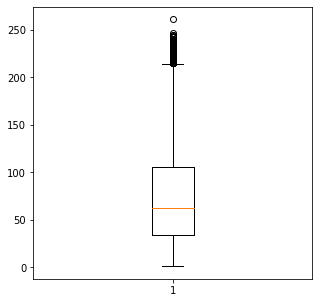

In [5]:
df['after_clean_len'] = [len(t) for t in df.cleantext]

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.after_clean_len)
plt.show()

In [6]:
#Joinings the dataframe into a long string
text = " ".join(twt for twt in df.cleantext)
print ("There are {} words in the cleaned tweets dataset.".format(len(text)))

There are 1124033 words in the cleaned tweets dataset.


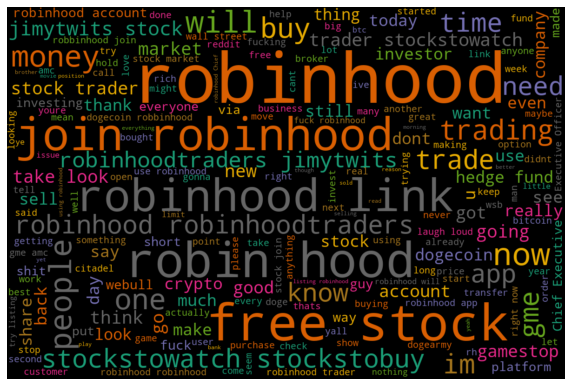

In [7]:
#WordCloud
wordcloud = WordCloud(width=1200, height=800, random_state=22, max_font_size=150, relative_scaling=0.5, colormap='Dark2').generate(text)

#Display the generated image:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
import collections
from collections import Counter

x = []
for txt in df.iterrows():
    x += txt[1]['cleantext'].split(' ')

#Top Common Words
topwords = Counter(x).most_common()
topwords[:5]

[('robinhood', 9774),
 ('stock', 3785),
 ('get', 2765),
 ('free', 2145),
 ('not', 1957)]

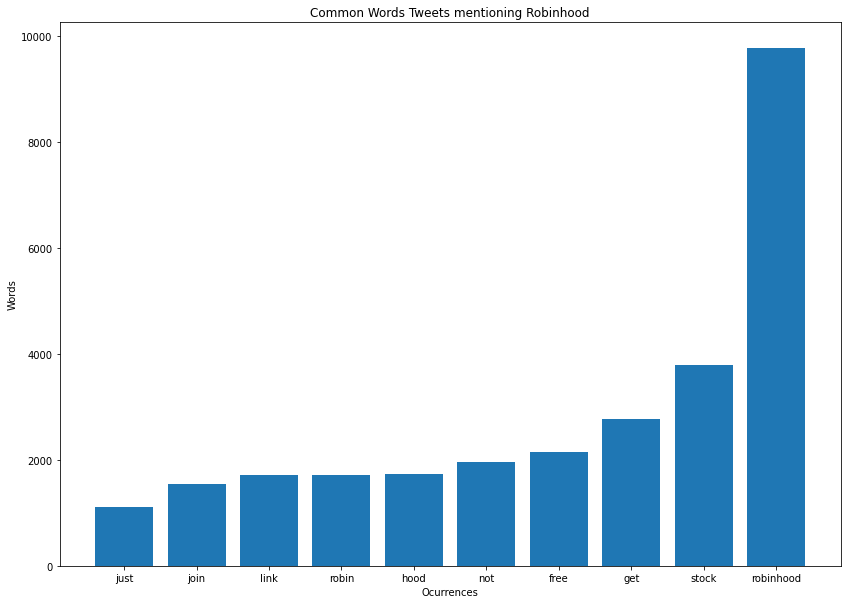

In [9]:
#Visualizing the Common Words
top = topwords[:10]
top.reverse()
x , y = zip(*(top))

plt.figure(figsize=(14, 10))
plt.bar(x, y)

plt.title("Common Words Tweets mentioning Robinhood")
plt.xlabel('Ocurrences')
plt.ylabel('Words')
plt.show()

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

#Sentiment Analysis
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity = sid.polarity_scores(text)
    return 'neg' if polarity['neg'] > polarity['pos'] else 'pos'

sentiments_using_SIA = df.cleantext.apply(lambda text: fetch_sentiment_using_SIA(text))

sp = pd.DataFrame(sentiments_using_SIA.value_counts())

sp


,cleantext
pos,11042
neg,3730


In [ ]:
#Visualizing the results
label = 'Positive Words','Negative Words'
color = ['green', 'red']

plt.pie(sp, labels=label, autopct='%1.1f%%', colors=color)

#draw center circle hole
cc = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(cc)

#display
plt.tight_layout()
plt.title('Robinhood Tweets Polarity Chart')
plt.axis('equal')
plt.show()